In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the data
data = pd.read_csv('Salary_Data.csv')

In [3]:
#dependent and independent data
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [4]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# random_state = 0 "obtain consistent results across multiple runs"

In [5]:
# scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train.reshape(-1,1))
X_test = sc_X.transform(X_test.reshape(-1,1))
#reshapes the X_train array to be a 2D array (matrix) required during fitting with one column and as many rows as necessary (-1 automatically infers the number of rows based on the length of X_train) 

In [6]:
arr=np.array([1,2,3,4,5,6])

In [7]:
print(arr)

[1 2 3 4 5 6]


In [8]:
reshaped=arr.reshape(2,3)

In [9]:
print(reshaped)

[[1 2 3]
 [4 5 6]]


In [10]:
reshaped1=arr.reshape(-1,1)

In [11]:
print(y_test)

[ 37731 122391  57081  63218 116969 109431]


In [12]:
#Building a decision tree model
from sklearn.tree import DecisionTreeRegressor
regressorDT = DecisionTreeRegressor() 
regressorDT.fit(X_train, y_train.reshape(-1,1))

DecisionTreeRegressor()

In [13]:
#train the model on X_train and y_train
from sklearn.linear_model import LinearRegression
regressorR = LinearRegression()
regressorR.fit(X_train, y_train)
#regressorR.fit(X_train, y_train.reshape(-1,1))

LinearRegression()

In [14]:
coefficients = regressorR.coef_
intercept = regressorR.intercept_

In [15]:
print(coefficients)
print(intercept)

[24053.85556857]
73886.20833333333


In [16]:
#predicting the test set results
y_predR = regressorR.predict(X_test) #regression model

In [17]:
print(y_predR)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [18]:
y_predDT = regressorDT.predict(X_test) #decision tree

In [19]:
print(y_predDT)

[ 46205.  121872.   56375.5  56375.5 112635.  105582. ]


In [20]:
# Evaluating the model using mean squared error (DT)
from sklearn.metrics import mean_squared_error
mseDT = mean_squared_error(y_test, y_predDT)

In [21]:
print(mseDT)

25498988.416666668


In [22]:
# Evaluating the model using mean squared error (R)
from sklearn.metrics import mean_squared_error
mseR = mean_squared_error(y_test, y_predR)

In [23]:
print(mseR)

12823412.298126562


### Visualization of Linear regression model and Decision tree model

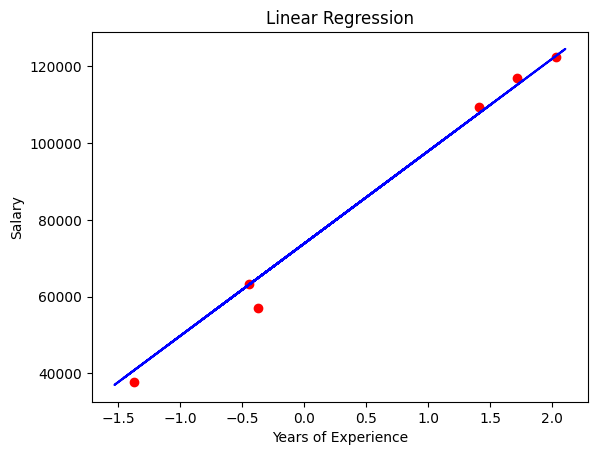

In [24]:
#visualizing the linear regression model

plt.scatter(X_test, y_test, color = 'red') 
plt.plot(X_train, regressorR.predict(X_train), color = 'blue')

plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


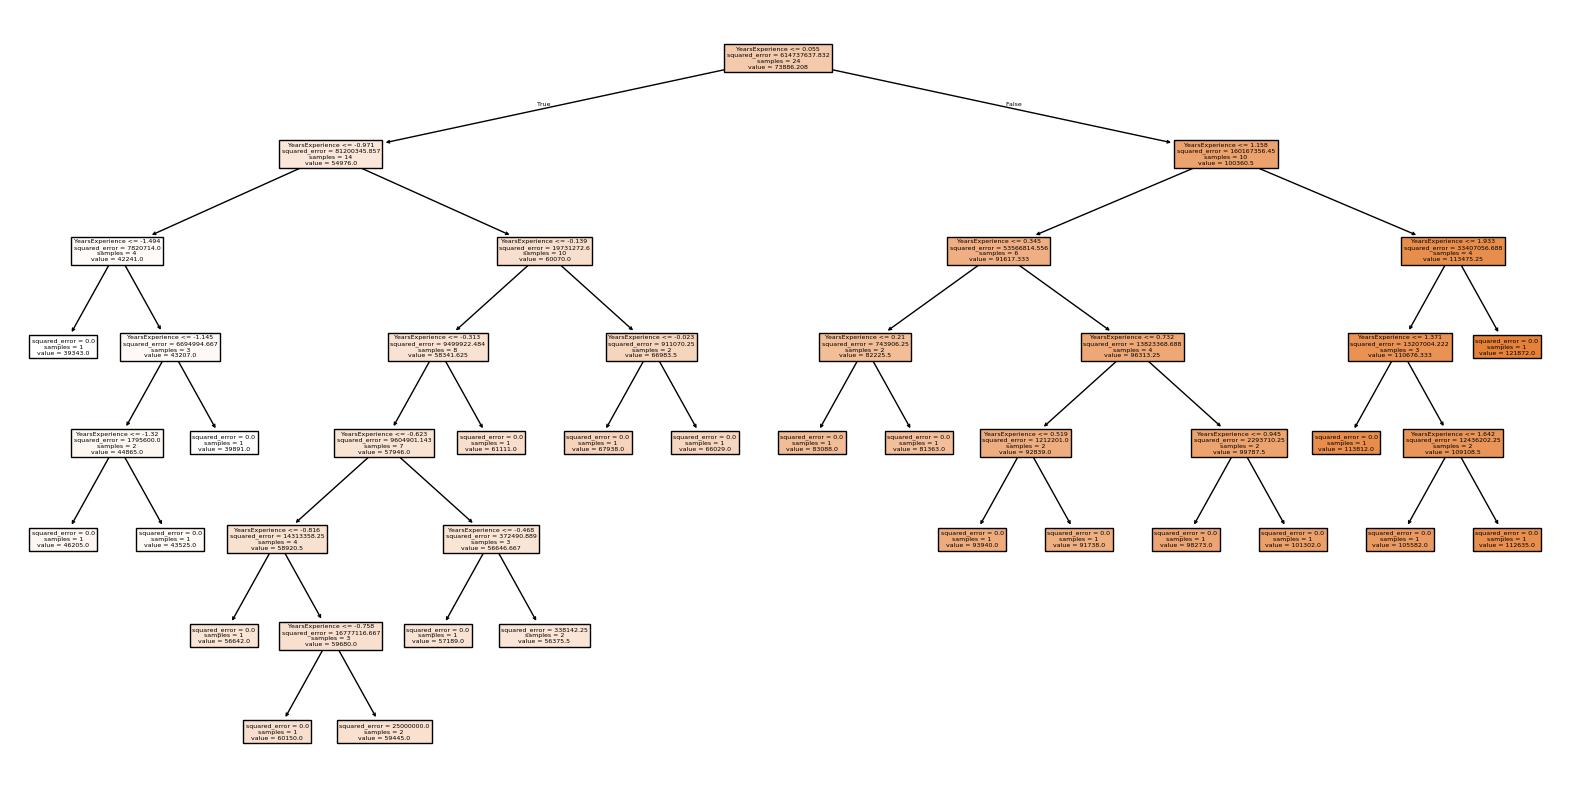

In [25]:
# Visualization of the decision tree model

from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20,10)) #A width of 20  inches and height of 10  inches
plot_tree(regressorDT,filled=True, feature_names=['YearsExperience'])
plt.show()

### saving and loading a trained machine learning model (deployment)

In [26]:
import joblib

#Saving the trained ML model (regressor) to a file named 'salarymod_model.pkl'
joblib.dump(regressorR,'salary_model.pkl')


['salary_model.pkl']

In [27]:
#Loading the saved model back into a variable named using joblib.load()
loaded_salarymod = joblib.load('salary_model.pkl')

In [31]:

#Accepts user input for the number of years of experience
years_of_experience = float(input("Enter years of experience: "))


Enter years of experience:  12


In [32]:
#Prepares the input data for prediction (new_data)
new_data = [[years_of_experience]]

#Print the predicted salary
predicted_salary = loaded_salarymod.predict(new_data)

# Print the predicted salary
print(f"The predicted salary for {years_of_experience} years of experience is:{predicted_salary[0]}")



The predicted salary for 12.0 years of experience is:362532.47515612585
